In [1]:
from opto import trace
from opto.optimizers import OptoPrime

import random
import time

In [2]:
# We'll use below utilities to run a python function.
from IPython.core.interactiveshell import InteractiveShell

def run_function_in_interpreter(func_code):
    # raise Exception("This function will run the code returned by GPT-4o. Remove this if you'd like to run the code!")
    interpreter = InteractiveShell.instance()

    interpreter.run_cell(func_code, store_history=False, silent=True)

    func_name = func_code.split("def ")[1].split("(")[0].strip()
    func = interpreter.user_ns[func_name]

    return func



def test_longest_increasing_subsequence(fn):
    nums = [10, 22, 9, 33, 21, 50, 41, 60]
    assert fn(nums) == 5

    nums = [7, 2, 1, 3, 8, 4, 9, 6, 5]
    assert fn(nums) == 4

    nums = [5, 4, 3, 2, 1]
    assert fn(nums) == 1

    nums = [1, 2, 3, 4, 5]
    assert fn(nums) == 5

    nums = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5]
    assert fn(nums) == 4

    nums = [10, 9, 2, 5, 3, 7, 101, 18]
    assert fn(nums) == 4

    nums = [0, 8, 4, 12, 2, 10, 6, 14, 1, 9, 5, 13, 3, 11, 7, 15]
    assert fn(nums) == 6

    nums = [7, 7, 7, 7, 7, 7, 7]
    assert fn(nums) == 1

    nums = [20, 25, 47, 35, 56, 68, 98, 101, 212, 301, 415, 500]
    assert fn(nums) == 11

    nums = [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]
    assert fn(nums) == 1

    print("All test cases passed!")

In [3]:
problem_text = """Longest Increasing Subsequence (LIS)

Problem Statement:
Given a sequence of integers, find the length of the longest subsequence that is strictly increasing. A subsequence is a sequence that can be derived from another sequence by deleting some or no elements without changing the order of the remaining elements.

Input:
The input consists of a list of integers representing the sequence.

Output:
The output should be an integer representing the length of the longest increasing subsequence."""

initial_solution = """
def longest_increasing_subsequence(nums):
    n = len(nums)
    dp = [1] * n

    for i in range(1, n):
        for j in range(i):
            if nums[i] > nums[j]:
                dp[i] = max(dp[i], dp[j] + 1)

    max_length = max(dp)
    lis = []

    for i in range(n - 1, -1, -1):
        if dp[i] == max_length:
            lis.append(nums[i])
            max_length -= 1

    return len(lis[::-1])
"""

# Generate a random test case
def generate_random_test_case(size, min_value, max_value):
    return [random.randint(min_value, max_value) for _ in range(size)]

# Test the function with a random test case
size = 10000  # Adjust the size as needed
min_value = 1
max_value = 1000

nums = generate_random_test_case(size, min_value, max_value)


In [4]:
longest_increasing_subsequence = run_function_in_interpreter(initial_solution)

start_time = time.time()
lis = longest_increasing_subsequence(nums)
end_time = time.time()

print(f"Test Case Size: {size}")
print(f"Longest Increasing Subsequence Length: {lis}")
print(f"Runtime: {end_time - start_time:.5f} seconds")

# Test for all test cases
test_longest_increasing_subsequence(longest_increasing_subsequence)

Test Case Size: 10000
Longest Increasing Subsequence Length: 180
Runtime: 5.81503 seconds
All test cases passed!


# Trace code

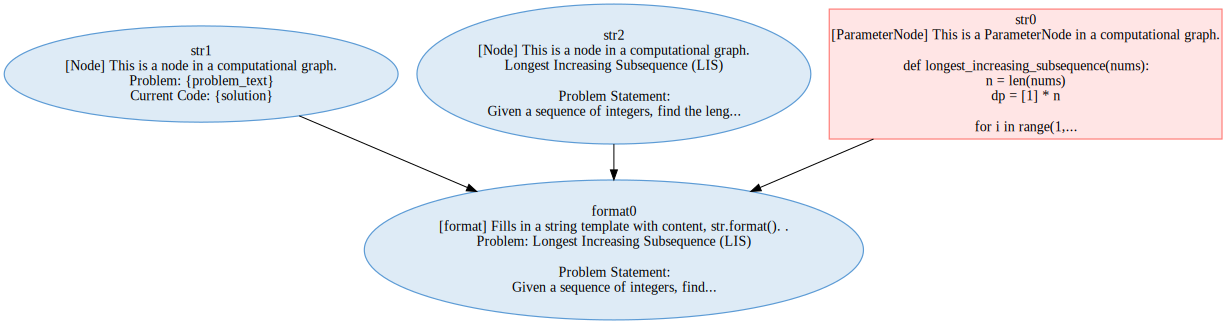

In [5]:

code = trace.node(initial_solution, trainable=True)
opt = OptoPrime([code])

feedback = "Think about the problem and the code snippet. Does the code solve the problem? What is the runtime complexity? Improve the runtime complexity of the code."
format_string = "Problem: {problem_text}\nCurrent Code: {solution}"

from opto.trace import operators as ops
problem = ops.format(format_string, problem_text=problem_text, solution=code)
opt.zero_feedback()

# Let's visualize our computation graph.
problem.backward(feedback, visualize=True)


In [6]:
# Let's update the code
opt.step(verbose='output')


LLM response:
 {
"reasoning": "The instruction requires improving the output based on the feedback, which suggests analyzing and optimizing the code snippet for solving the Longest Increasing Subsequence (LIS) problem. The current code employs a dynamic programming approach with a time complexity of O(n^2), where 'n' is the length of the input list. To enhance this, the code can be optimized using a combination of dynamic programming and binary search, which reduces the time complexity to O(n log n). This involves maintaining a list to track the smallest possible tail for increasing subsequences of varying lengths and utilizing binary search to find the appropriate position to update the list.",
"answer": null,
"suggestion": {
    "str0": "def longest_increasing_subsequence(nums):\n    if not nums:\n        return 0\n    tails = []\n    for num in nums:\n        left, right = 0, len(tails)\n        while left < right:\n            mid = (left + right) // 2\n            if tails[mid] < 

In [7]:
# Hopefully, we should get much better runtime!
longest_increasing_subsequence = run_function_in_interpreter(code.data)

start_time = time.time()
lis = longest_increasing_subsequence(nums)
end_time = time.time()

print(f"Longest Increasing Subsequence Length: {lis}")
print(f"Runtime: {end_time - start_time:.5f} seconds")

test_longest_increasing_subsequence(longest_increasing_subsequence)

Longest Increasing Subsequence Length: 180
Runtime: 0.01259 seconds
All test cases passed!


At this point, OptoPrime in Trace solves the problem. There's no need to further iterate. 

In [8]:
print(code.data)

def longest_increasing_subsequence(nums):
    if not nums:
        return 0
    tails = []
    for num in nums:
        left, right = 0, len(tails)
        while left < right:
            mid = (left + right) // 2
            if tails[mid] < num:
                left = mid + 1
            else:
                right = mid
        if left == len(tails):
            tails.append(num)
        else:
            tails[left] = num
    return len(tails)
